In [2]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [3]:
data = pd.read_csv("data.csv")

In [5]:
data["Authors"]

0     Srinivasan S., Batra R., Luo D., Loeffler T., ...
1                        Kakkar D., Blossom J., Guan W.
2                 Xie F., Luo H., Li S., Liu Y., Lin B.
3     Preisser M., Passalacqua P., Bixler R.P., Hofm...
4                  Yu W., Wang Z., Li J., Luo Y., Yu Z.
5     Wang L., Chen X., Xia Y., Jiang L., Ye J., Hou...
6     Giuliani G., Rodila D., Külling N., Maggini R....
7     Isaeva I.I., Voronin A.A., Khoperskov A.V., Kh...
8     Moshiri N., Fisch K.M., Birmingham A., DeHoff ...
9     McCarthy M.J., Otis D.B., Hughes D., Muller-Ka...
10    Wang S., Gou G., Sui H., Zhou Y., Zhang H., Li J.
11    Pacheco-Pascagaza A.M., Gou Y., Louis V., Robe...
12                  Hu H., Li J., Wu C., Li X., Chen Y.
13                   Jones-Ivey R., Patra A., Bursik M.
14    Srinivasakumar V., Vanamoorthy M., Sairaj S., ...
15                                     Yang L., Song X.
16                                             Zhang G.
17    Baba M.W., Thoumyre G., Bergsma E.W.J., Da

In [3]:
profile = ProfileReport(data, title="Profiling Report")

In [4]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup

from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

import string
import nltk
from nltk.corpus import stopwords

In [6]:
# nltk.download('stopwords')

In [7]:
punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«"]    

punctuation += sp_punctuation

In [8]:
data.keys()

Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Abstract',
       'Author Keywords', 'Index Keywords', 'Correspondence Address',
       'Editors', 'Publisher', 'ISSN', 'ISBN', 'CODEN', 'PubMed ID',
       'Language of Original Document', 'Abbreviated Source Title',
       'Document Type', 'Publication Stage', 'Open Access', 'Source', 'EID'],
      dtype='object')

In [9]:
titulos = str
for titulo in data["Author Keywords"]:
    titulos = str(titulo) + " " + str(titulos)
titulos

"Big data applications; high performance computing; image classification; inference mechanisms; machine learning; supervised learning Biologically-inspired computational models; Central Processing Units (CPUs); Irregular computation; MPI; Neuroscience; OpenMP; Sparse computation Design space exploration; FPGAs; High-level synthesis; High-performance computing High performance computing; Research software; Research software engineering; Scientific computing; Scientific software; Scientific software development DNA methylation; GPU computing; High performance computing; Wavelet transform clustering; dimensionality reduction; high-performance computing; Julia; self-organizing maps; single-cell cytometry Data fusion; Forest monitoring; Google Earth Engine; Landsat; Mangrove forests; Multi-temporal analysis; Remote sensing; Satellite earth observation; Time series analysis; Vietnam Ambient noise; Big data; Crustal monitoring; Parallel and high-performance computing; Seismic interferometry; 

In [10]:
stop_words = stopwords.words('english')

In [11]:
for p in punctuation:
    clean_texto = titulos.lower().replace(p,"")
    
for p in punctuation:
    clean_texto = clean_texto.replace(p,"")


In [12]:
for stop in stop_words:
    clean_texto_list = clean_texto.split()
    clean_texto_list = [i.strip() for i in clean_texto_list]
    try:
        while stop in clean_texto_list: clean_texto_list.remove(stop)
    except:
        print("Error")
        pass
    clean_texto= " ".join(clean_texto_list)

In [13]:
lista_texto = clean_texto.split(" ")

palabras = []

for palabra in lista_texto:
    if (len(palabra)>=3 and len(palabra)<18):
        palabras.append(palabra)

In [14]:
word_count={}
for palabra in palabras:
    if palabra in word_count.keys():
        word_count[palabra][0]+=1
    else:
        word_count[palabra]=[1]
 

In [15]:
df = pd.DataFrame.from_dict(word_count).transpose()
df.columns=["freq"]
df.sort_values(["freq"], ascending=False, inplace=True)
df.head(10)

,freq
computing,19
data,8
high,7
performance,7
highperformance,7
learning,6
analysis,5
system,5
nan,5
earth,5


In [16]:
def plot_bar(data=df, top=5):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df.iloc[:top,:].index, height = df.iloc[:top,0].values)
    plt.show()

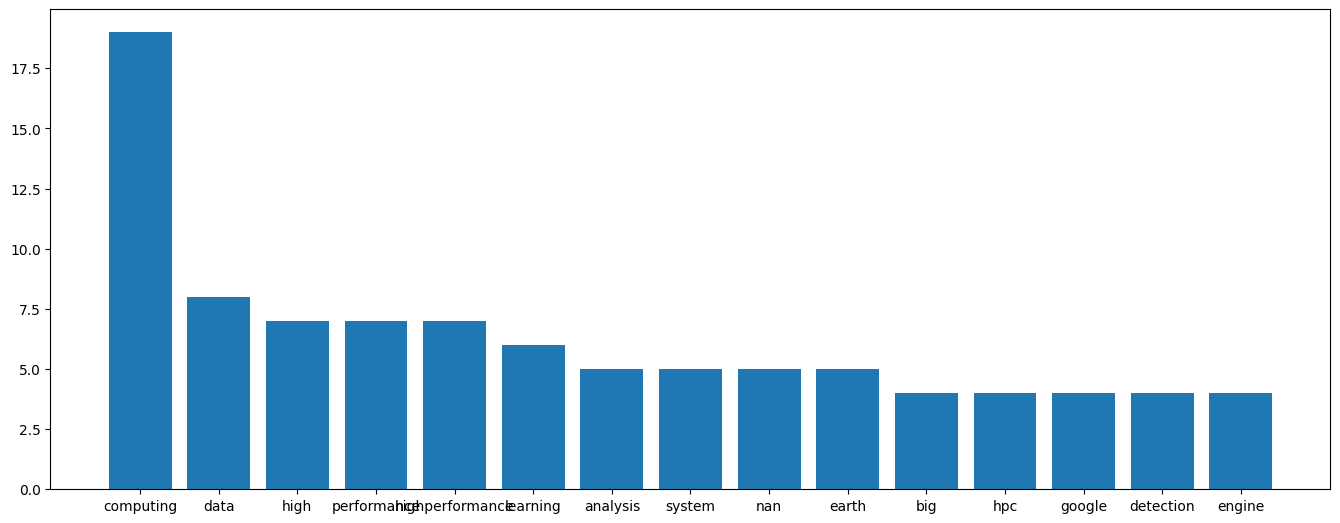

In [17]:
plot_bar(data=df, top=15)

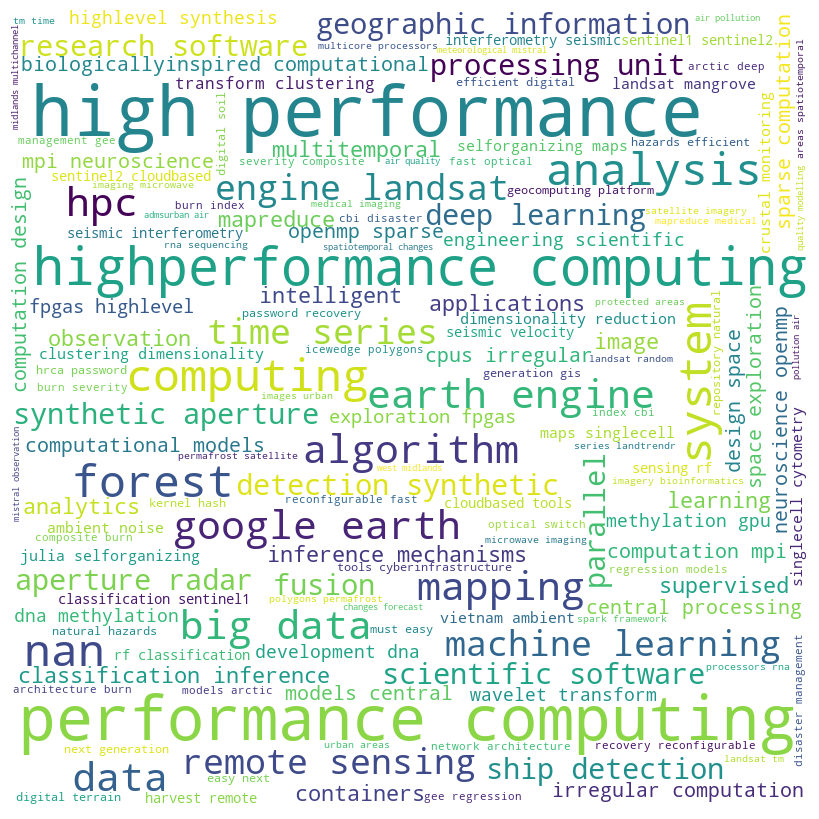

In [18]:
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5, collocation_threshold=10).generate(clean_texto)

word_cloud.to_file("n1.png") #Guardamos la imagen generada

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [19]:
data.head()

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,"Srinivasan S., Batra R., Luo D., Loeffler T., ...",55178260200;57189219132;57726549500;5550388820...,Machine learning the metastable phase diagram ...,2022,Nature Communications,13,1,3251,NaN,NaN,...,NaN,NaN,35668085.0,English,Nat. Commun.,Article,Final,"All Open Access, Gold, Green",Scopus,2-s2.0-85131312407
1,"Kakkar D., Blossom J., Guan W.",57202621458;16634373600;57697783400;,RINX: A SOLUTION FOR INFORMATION EXTRACTION FR...,2022,"International Archives of the Photogrammetry, ...",48,4/W1-2022,NaN,245.0,250.0,...,NaN,NaN,NaN,English,"Int. Arch. Photogramm., Remote Sens. Spat. Inf...",Conference Paper,Final,"All Open Access, Gold",Scopus,2-s2.0-85137179212
2,"Xie F., Luo H., Li S., Liu Y., Lin B.",57289748600;35280199900;57255375100;5785783390...,Using Clean Energy Satellites to Interpret Ima...,2022,Sustainability (Switzerland),14,15,9277,NaN,NaN,...,NaN,NaN,NaN,English,Sustainability,Article,Final,"All Open Access, Gold",Scopus,2-s2.0-85137235953
3,"Preisser M., Passalacqua P., Bixler R.P., Hofm...",57204691479;57203119863;55387354400;57210107145;,Intersecting near-real time fluvial and pluvia...,2022,Hydrology and Earth System Sciences,26,15,NaN,3941.0,3964.0,...,NaN,NaN,NaN,English,Hydrol. Earth Syst. Sci.,Article,Final,"All Open Access, Gold, Green",Scopus,2-s2.0-85135632044
4,"Yu W., Wang Z., Li J., Luo Y., Yu Z.",57338519900;57338075600;57337925600;5557553900...,A Lightweight Network Based on One-Level Featu...,2022,Remote Sensing,14,14,3321,NaN,NaN,...,NaN,NaN,NaN,English,Remote Sens.,Article,Final,"All Open Access, Gold",Scopus,2-s2.0-85136424655
